# Link to my Medium Article

https://medium.com/@arlanbektas720/%D0%B1%D0%B0%D0%BD%D0%BA%D1%82%D1%96%D0%BA-%D0%BC%D0%B0%D1%80%D0%BA%D0%B5%D1%82%D0%B8%D0%BD%D0%B3-cc4f5e8c639d

## Information About Dataset

1. **Age (numeric):**
   - Represents the age of the bank client.

2. **Job (categorical):**
   - Represents the type of job the bank client has.
   - Categories include:
     - "admin."
     - "unknown"
     - "unemployed"
     - "management"
     - "housemaid"
     - "entrepreneur"
     - "student"
     - "blue-collar"
     - "self-employed"
     - "retired"
     - "technician"
     - "services"

3. **Marital (categorical):**
   - Represents the marital status of the bank client.
   - Categories include:
     - "married"
     - "divorced" (Note: includes both divorced and widowed)
     - "single"

4. **Education (categorical):**
   - Represents the educational level of the bank client.
   - Categories include:
     - "unknown"
     - "secondary"
     - "primary"
     - "tertiary"

5. **Default (binary):**
   - Indicates whether the client has credit in default.
   - Categories: "yes" or "no"

6. **Balance (numeric):**
   - Represents the average yearly balance in euros for the bank client.

7. **Housing (binary):**
   - Indicates whether the client has a housing loan.
   - Categories: "yes" or "no"

8. **Loan (binary):**
   - Indicates whether the client has a personal loan.
   - Categories: "yes" or "no"

9. **Contact (categorical):**
   - Represents the contact communication type for the last contact.
   - Categories include:
     - "unknown"
     - "telephone"
     - "cellular"

10. **Day (numeric):**
    - Represents the last contact day of the month.

11. **Month (categorical):**
    - Represents the last contact month of the year.
    - Categories include: "jan", "feb", "mar", ..., "nov", "dec"

12. **Duration (numeric):**
    - Represents the last contact duration in seconds.

13. **Campaign (numeric):**
    - Represents the number of contacts performed during the current campaign for this client, including the last contact.

14. **Pdays (numeric):**
    - Represents the number of days that passed by after the client was last contacted from a previous campaign.
    - (-1 means the client was not previously contacted)

15. **Previous (numeric):**
    - Represents the number of contacts performed before the current campaign and for this client.

16. **Poutcome (categorical):**
    - Represents the outcome of the previous marketing campaign.
    - Categories include:
      - "unknown"
      - "other"
      - "failure"
      - "success"

17. **Output variable (desired target): Y (binary):**
    - Represents whether the client has subscribed to a term deposit.
    - Categories: "yes" or "no"

## 1.Data-Analysis part

In [54]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path, delimiter = ';')
df #here we see data itself

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [56]:
#here we can see the type and number of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45211 non-null  int64  
 1   job               45211 non-null  object 
 2   marital           45211 non-null  object 
 3   education         45211 non-null  object 
 4   default           45211 non-null  object 
 5   balance           45211 non-null  int64  
 6   housing           45211 non-null  object 
 7   loan              45211 non-null  object 
 8   contact           45211 non-null  object 
 9   day               45211 non-null  int64  
 10  month             45211 non-null  object 
 11  duration          45211 non-null  int64  
 12  campaign          45211 non-null  int64  
 13  pdays             45211 non-null  int64  
 14  previous          45211 non-null  int64  
 15  poutcome          45211 non-null  object 
 16  y                 45211 non-null  object

In [57]:
df_train.describe()
#take a look at the statistical part of the dataset (count, mean, standard deviation, min, max)

,age,balance,day,duration,campaign,pdays,previous,duration_minutes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,4.302718
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,4.292130
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.716667
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,5.316667
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,81.966667


In [58]:
df_train.isna().sum()
#checking every column for missing values

age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
y                   0
duration_minutes    0
dtype: int64

### 1.1 Categorical columns  and its variables

In [59]:
categorical_columns_list = []
for column_name in df_train.columns:
    if df_train[column_name].dtype == 'object':
        categorical_columns_list.append(column_name)

print(categorical_columns_list, end=' ')
#list of categorical columns

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 

In [60]:
print('Jobs:\n', df_train['job'].unique())
print('Marital:\n', df_train['marital'].unique())
print('Education:\n', df_train['education'].unique())
print('Default:\n', df_train['default'].unique())
print('Housing:\n', df_train['housing'].unique())
print('Loan:\n', df_train['loan'].unique())
print('Contact:\n', df_train['contact'].unique())
print('Loan:\n', df_train['loan'].unique())
print('Month:\n', df_train['month'].unique())
print('Poutcome:\n', df_train['poutcome'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Loan:
 ['no' 'yes']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Poutcome:
 ['unknown' 'failure' 'other' 'success']


### 1.2 Data visualtization for categorical columns

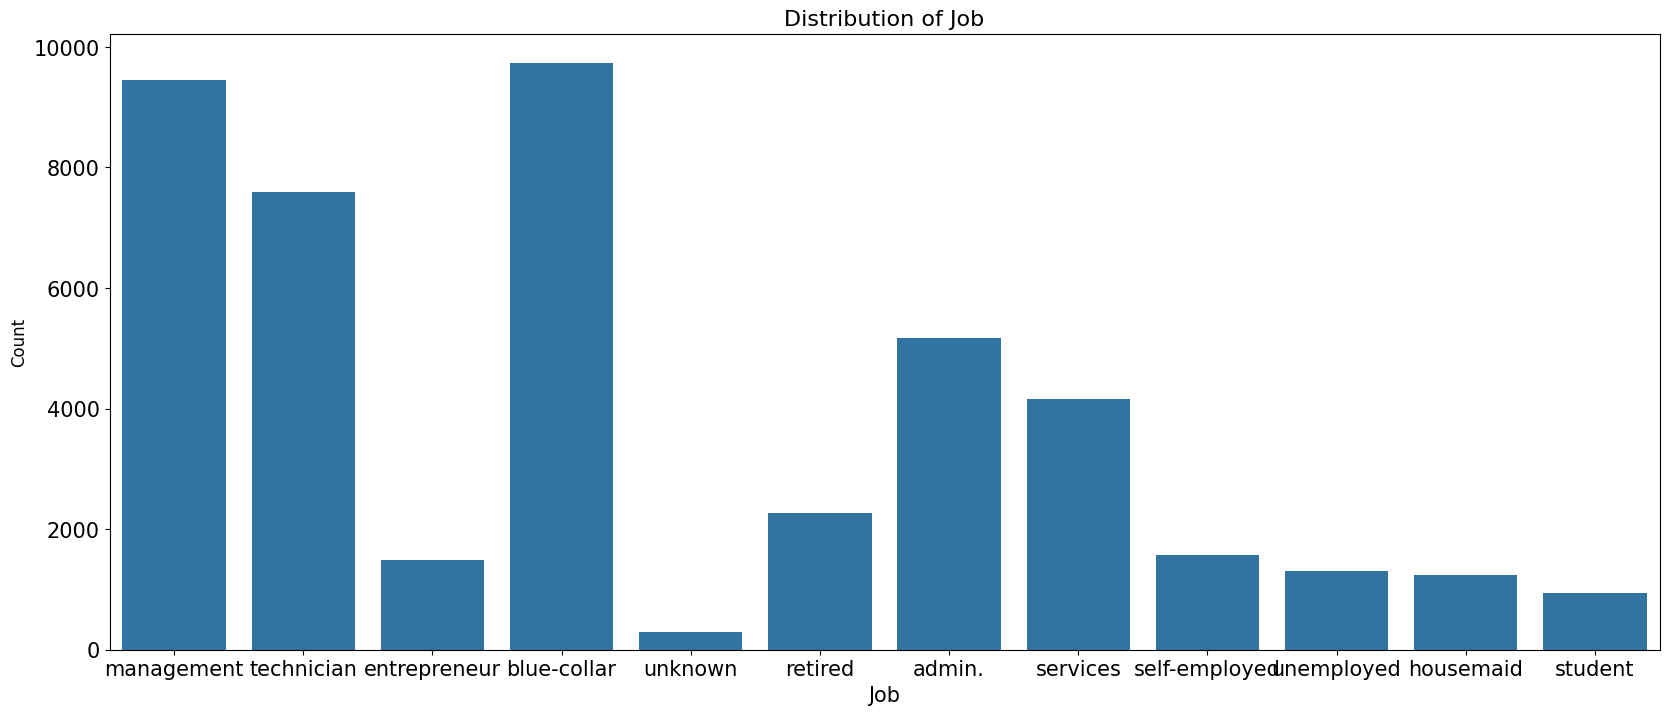

In [61]:
# Plot for 'job'
plt.figure(figsize=(20, 8))
sns.countplot(x='job', data=df_train)
plt.title('Distribution of Job', fontsize=16)
plt.xlabel('Job', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

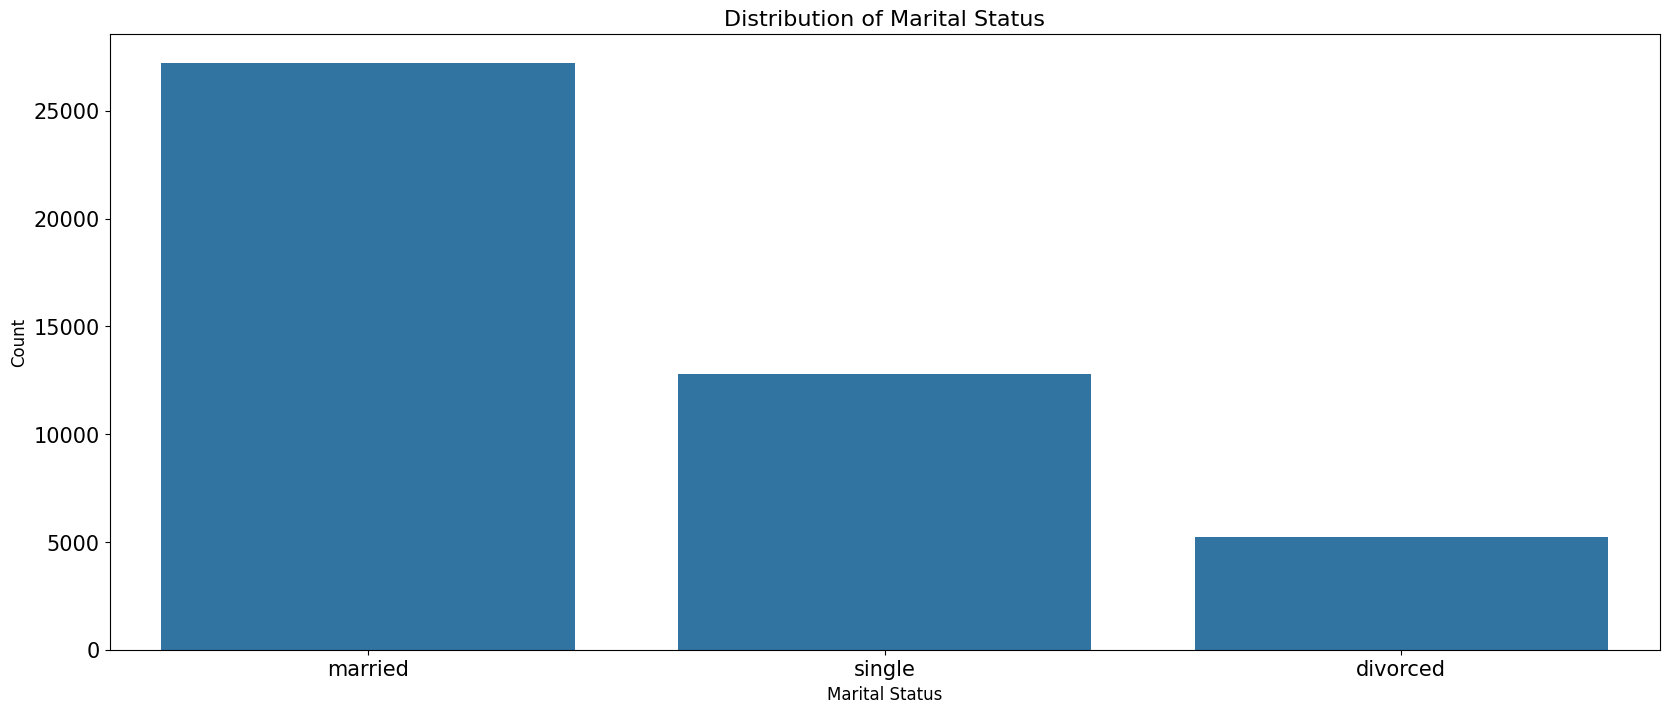

In [62]:
# Plot for 'marital'
plt.figure(figsize=(20, 8))
sns.countplot(x='marital', data=df_train)
plt.title('Distribution of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

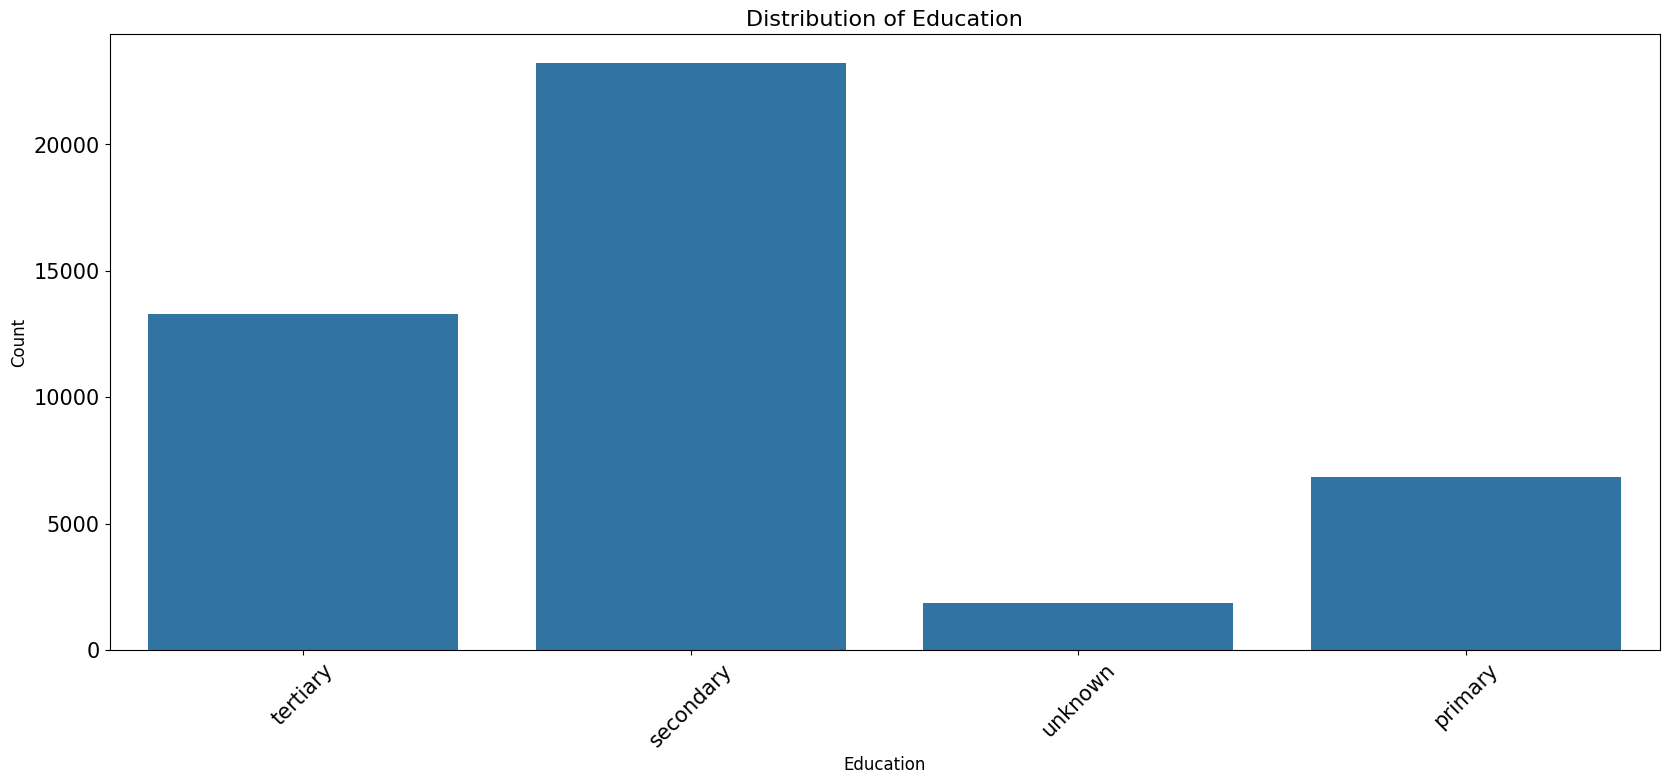

In [63]:
# Plot for 'education'
plt.figure(figsize=(20, 8))
sns.countplot(x='education', data=df_train)
plt.title('Distribution of Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='center', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

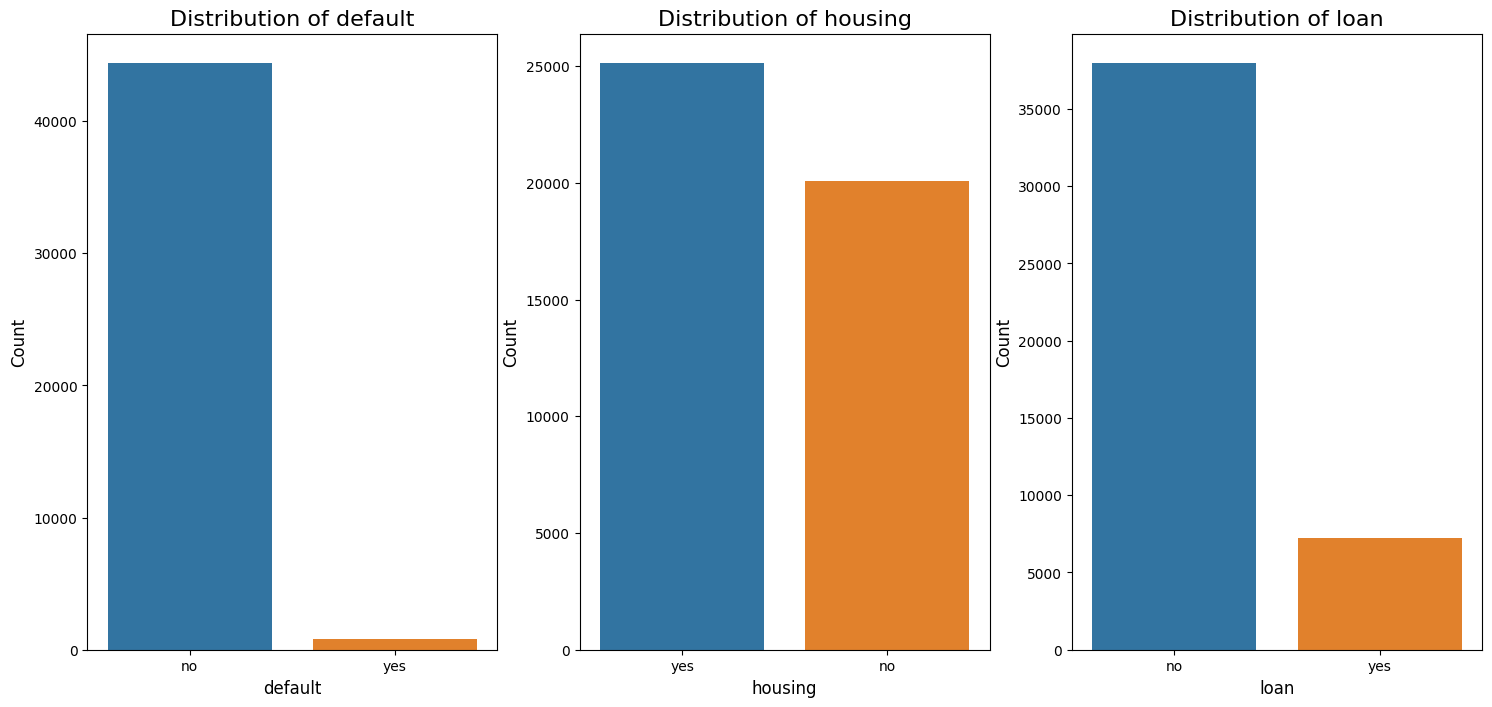

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

# Plot each binary column
binary_columns = ['default', 'housing', 'loan']

for i, column_name in enumerate(binary_columns):
    sns.countplot(x=column_name, data=df_train, hue=column_name, ax=axes[i], legend=False)
    axes[i].set_title(f'Distribution of {column_name}', fontsize=16)
    axes[i].set_xlabel(column_name, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    
plt.show()

In [ ]:
print('Default:\n No credit in default:'     , df_train[df_train['default'] == 'no']     ['age'].count(),
              '\n Yes to credit in default:' , df_train[df_train['default'] == 'yes']    ['age'].count())

In [ ]:
print('Housing:\n No housing in loan:'     , df_train[df_train['housing'] == 'no']     ['age'].count(),
              '\n Yes to housing in loan:' , df_train[df_train['housing'] == 'yes']    ['age'].count())

In [ ]:
print('Loan:\n No to personal loan:'     , df_train[df_train['loan'] == 'no']     ['age'].count(),
              '\n Yes to personal loan:'    , df_train[df_train['loan'] == 'yes']    ['age'].count())

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

# Plot each categorical columns 'contact', 'month', 'poutcome'
categorical_columns = ['contact', 'month', 'poutcome']

for i, column_name in enumerate(categorical_columns):
    sns.countplot(x=column_name, data=df_train, hue=column_name, palette=palette, ax=axes[i], legend=False)
    axes[i].set_title(f'Distribution of {column_name}', fontsize=16)
    axes[i].set_xlabel(column_name, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=0, labelsize=13)

plt.show()

### Data visualization for numeric-value columns

In [ ]:
numerical_columns_list = []
for column_name in df_train.columns:
    if df_train[column_name].dtype in ['int64', 'float64']:
        numerical_columns_list.append(column_name)

print(f'Numerical-value columns', numerical_columns_list, end=' ')
#list of numerical columns

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot box plot with outliers
sns.boxplot(y=df_train['age'], color='purple', ax=axes[0])
axes[0].set_title('Outliers Visualization for Age', fontsize=16)
axes[0].set_xlabel('Age', fontsize=12)

# Calculate quartiles and bounds
Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df_train['age'] < lower_bound) | (df_train['age'] > upper_bound)

# Plot box plot without outliers
sns.boxplot(y=df_train['age'][~outliers], color='purple', ax=axes[1])
axes[1].set_title('Box Plot of Age without Outliers', fontsize=16)
axes[1].set_xlabel('Age', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Quartiles
print('1º Quartile: ', df_train['duration'].quantile(q=0.25))
print('2º Quartile: ', df_train['duration'].quantile(q=0.50))
print('3º Quartile: ', df_train['duration'].quantile(q=0.75))
print('4º Quartile: ', df_train['duration'].quantile(q=1.00))

# Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

upper_whisker = df_train['duration'].quantile(q=0.75) + 1.5 * (df_train['duration'].quantile(q=0.75) - df_train['duration'].quantile(q=0.25))
print('Duration calls above: ', upper_whisker, ' are outliers')

In [ ]:
# Calculate mean, standard deviation, and coefficient of variation
mean_age = df_train['age'].mean()
std_dev_age = df_train['age'].std()
coef_var_age = (std_dev_age / mean_age) * 100  # Coefficient of variation in percentage

# Print the results
print(f"Mean age: {mean_age:.2f}")
print(f"Standard deviation of age: {std_dev_age:.2f}")
print(f"Coefficient of variation of age: {coef_var_age:.2f}%")

Conclusion about Age...


In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 'Contact'
sns.countplot(x='contact', data=df_train, ax=axes[0], palette='viridis', hue='contact', legend=False)
axes[0].set_title('Contact')

# Plot 'Month'
sns.countplot(x='month', data=df_train, ax=axes[1], palette='plasma', hue='month', legend=False)
axes[1].set_title('Month')

# # Plot 'Day of Week'
# sns.countplot(x='day', data=df_train, ax=axes[2], palette='magma', hue='day', legend=False)
# axes[2].set_title('Day of Week')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# graphs for duration
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot boxplot for outliers
sns.boxplot(x=df_train['duration'], ax=axes[0], color='purple')
axes[0].set_title('Outliers Visualization for Duration')
axes[0].set_xlabel('Duration (seconds)')

# Plot histogram for simple plot
sns.histplot(df_train['duration'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Duration (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Duration')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert 'duration' from seconds to minutes
df_train['duration_minutes'] = df_train['duration'] / 60

# Set up a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot boxplot for outliers in minutes
sns.boxplot(x=df_train['duration_minutes'], ax=axes[0], color='purple')
axes[0].set_title('Outliers Visualization for Duration (Minutes)')
axes[0].set_xlabel('Duration (Minutes)')

# Plot histogram for simple plot in minutes
sns.histplot(df_train['duration_minutes'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Duration (Minutes)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Duration (Minutes)')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Quartiles
print('1º Quartile: ', df_train['duration'].quantile(q=0.25))
print('2º Quartile: ', df_train['duration'].quantile(q=0.50))
print('3º Quartile: ', df_train['duration'].quantile(q=0.75))
print('4º Quartile: ', df_train['duration'].quantile(q=1.00))

# Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
upper_whisker = df_train['duration'].quantile(q=0.75) + 1.5 * (df_train['duration'].quantile(q=0.75) - df_train['duration'].quantile(q=0.25))
print('Duration calls above: ', upper_whisker, ' are outliers')

In [ ]:
# Calculate mean, standard deviation, and coefficient of variation
mean_duration = df_train['duration'].mean()
std_dev_duration = df_train['duration'].std()
coef_var_duration = (std_dev_duration / mean_duration) * 100  # Coefficient of variation in percentage

# Print the results
print(f"Mean duration: {mean_duration:.2f}")
print(f"Standard deviation of duration: {std_dev_duration:.2f}")
print(f"Coefficient of variation of duration: {coef_var_duration:.2f}%")

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x='y', data=df_train, palette='Set1', hue='y', legend=False)

plt.xlabel('Target Variable (y)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

plt.show()